# Exploratory Analysis

In [1]:
%run init.ipynb

## Distributions

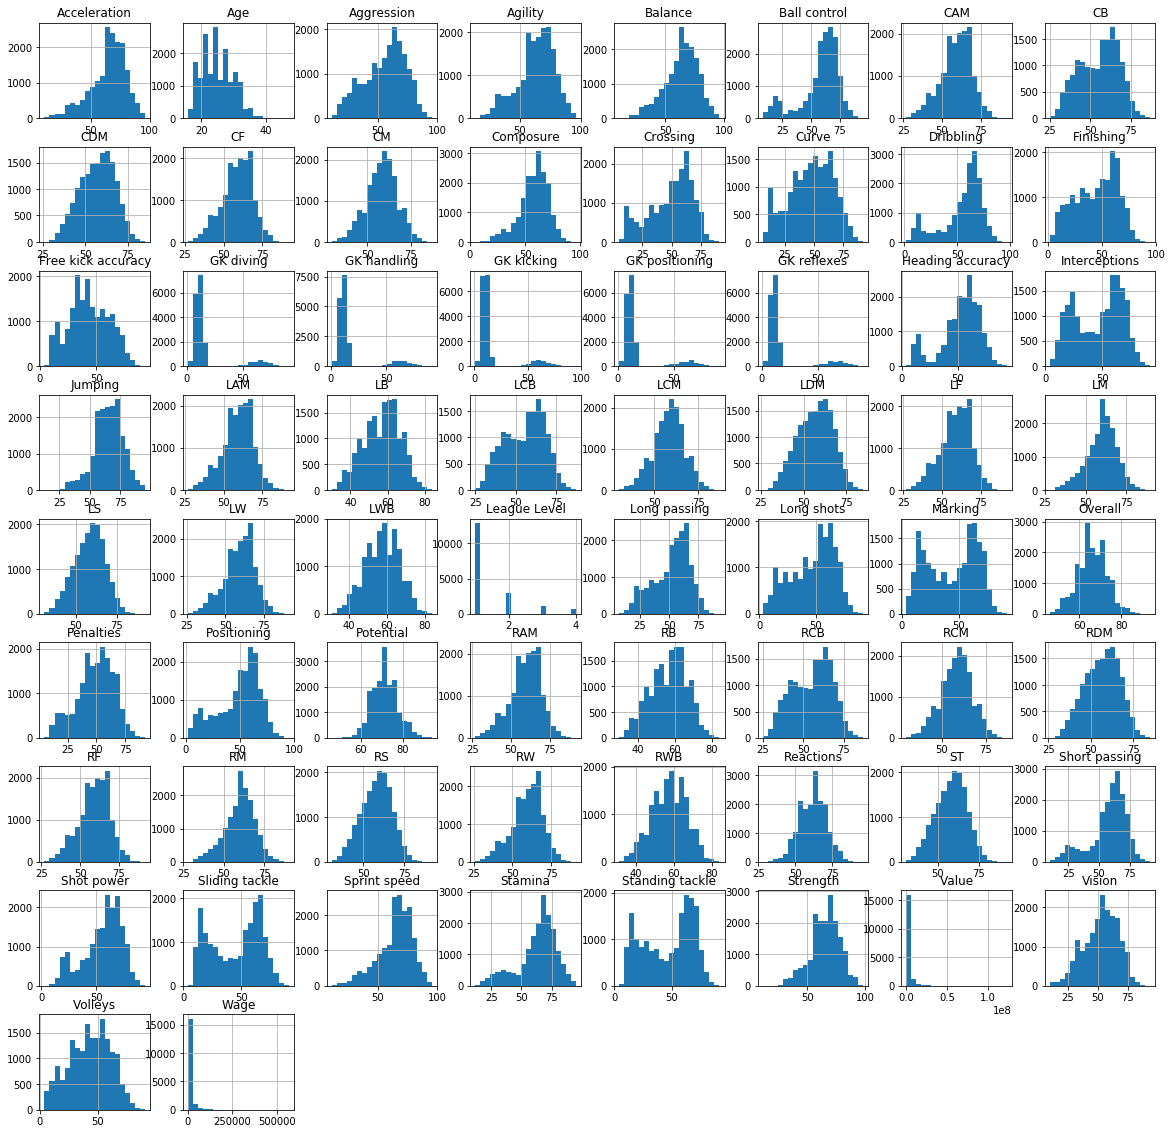

In [2]:
df.hist(bins=20, figsize=(20,20));

Apart from goal keeping attributes, let's pick unusual distributions, and see what different peeks correspond to. Start with goalkeepers.

In [3]:
dfGK = df[df['Preferred Positions'] == 'GK'];
dfNotGK = df[df['Preferred Positions'] != 'GK'];

In [4]:
distCols = ['Crossing', 'Dribbling', 'Finishing', 'Heading accuracy',
            'Interceptions', 'Marking', 'Positioning', 'Short passing',
            'Shot power', 'Sliding tackle', 'Stamina', 'Standing tackle'];
distColsPos = ['CB', 'LCB', 'RCB']; #can not be ralated to goalkeepers

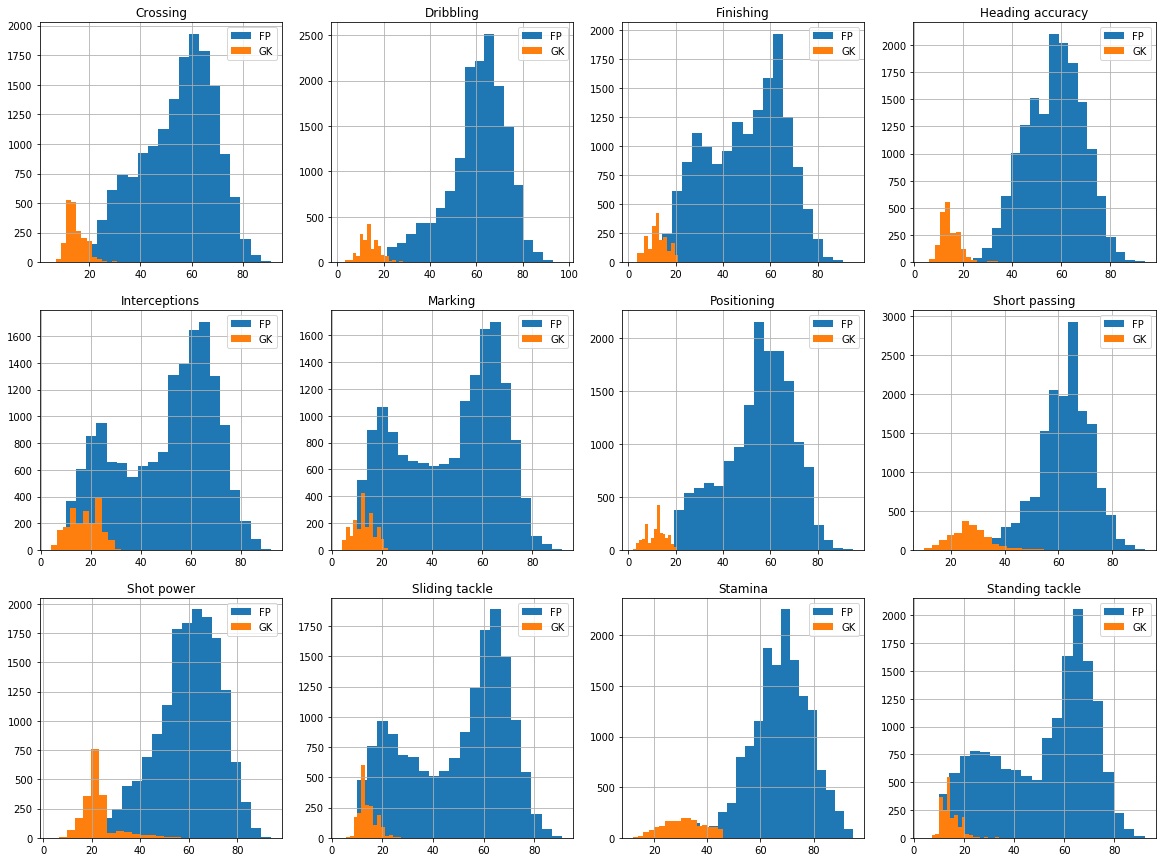

In [5]:
plt.figure(figsize=(20,15));
for i, col in enumerate(distCols):
    plt.subplot(3, 4, i+1);
    plt.title(col)
    dfNotGK[col].hist(bins=20);
    dfGK[col].hist(bins=20);
    plt.legend(['FP','GK'])

Some histograms separated, but a few still need explaining. Let's try other positions

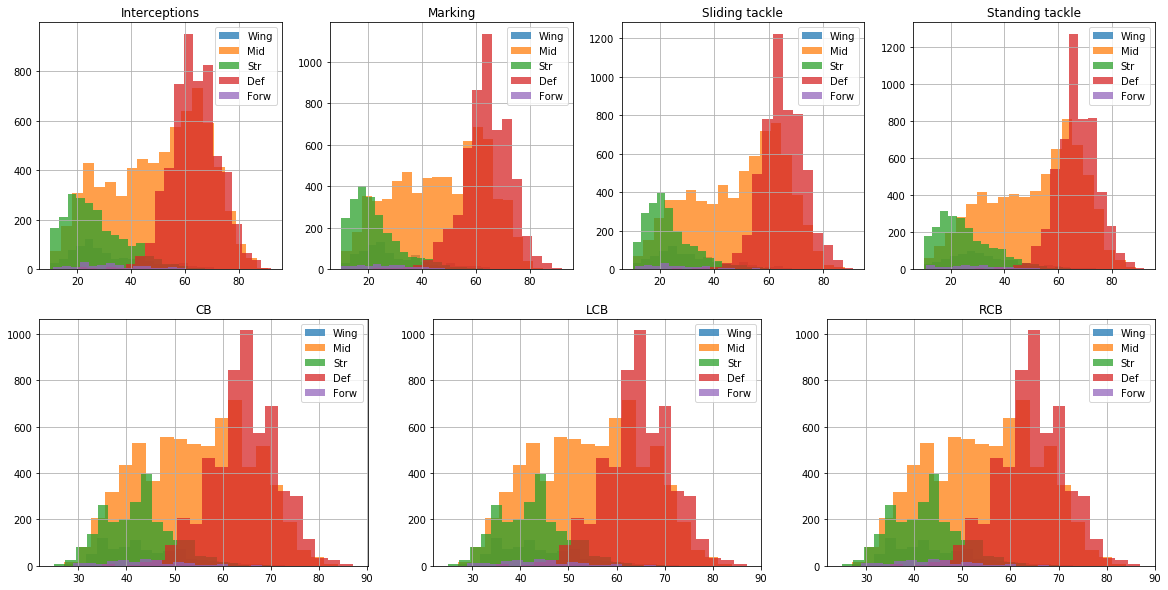

In [6]:
distColsOther = ['Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle'];
# sets randomly chage order
positions = ['W', 'M', 'T', 'B', 'F']; #{pos[-1] for pos in dfNotGK['Preferred Positions'].unique()};
posNames = ['Wing', 'Mid', 'Str', 'Def', 'Forw'];
plt.figure(figsize=(20,10));
for i, col in enumerate(distColsOther):
    plt.subplot(2, 4, i+1);
    plt.title(col);
    for pos in positions:
        dfNotGK[dfNotGK['Preferred Positions'].str[-1] == pos][col].hist(bins=20, alpha=0.75);
    plt.legend(posNames);
for i, col in enumerate(distColsPos):
    plt.subplot(2, 3, i+4);
    plt.title(col);
    for pos in positions:
        dfNotGK[dfNotGK['Preferred Positions'].str[-1] == pos][col].hist(bins=20, alpha=0.75);
    plt.legend(posNames);

We can see, that all of these are almost the same. Defenders have a high scores (last 3 are basicly defence positions) and strikers have low scores. Midfielders have different values for these attributes.

## Correlations

In [7]:
correlations = df.loc[:,'Age':'Volleys'].corr();

Graphical representation of correlation matrix

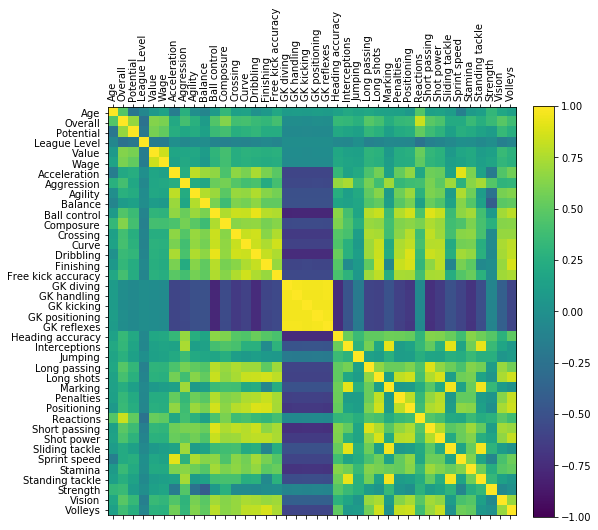

In [8]:
def plotCorrMatrix(correlations, fig, subplot=111):
    names = list(correlations.columns);
    ax = fig.add_subplot(subplot);
    cax = ax.matshow(correlations, vmin=-1, vmax=1);
    fig.colorbar(cax, fraction=0.046, pad=0.04); #alignment
    ticks = np.arange(0,len(names));
    ax.set_xticks(ticks);
    ax.set_yticks(ticks);
    ax.set_xticklabels(names, rotation='vertical');
    ax.set_yticklabels(names);

plotCorrMatrix(correlations, plt.figure(figsize=(8,8)));

There are some strongly negatively correlated regions, let's see why.

These variables correspond to goalkeeper's properties, so we can split the data.

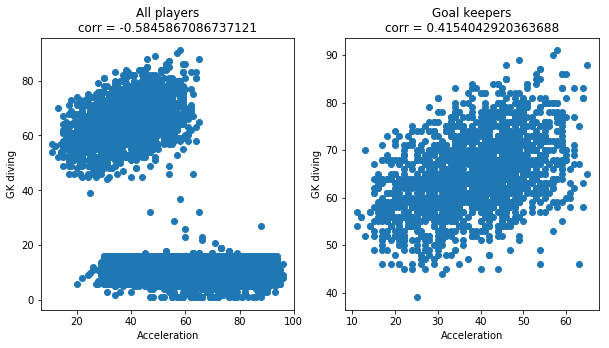

In [9]:
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.title('All players\ncorr = {}'.format(df['Acceleration'].corr(df['GK diving'])));
plt.scatter(df['Acceleration'], df['GK diving']);
plt.xlabel('Acceleration');
plt.ylabel('GK diving');
plt.subplot(1,2,2);
plt.title('Goal keepers\ncorr = {}'.format(dfGK['Acceleration'].corr(dfGK['GK diving'])));
plt.scatter(dfGK['Acceleration'], dfGK['GK diving']);
plt.xlabel('Acceleration');
plt.ylabel('GK diving');

This is an example of Simpson's paradox. We have positiove correlation for one cluster(goalkeepers), almost no correlation for others, and the resultiong data appears to be negatively correlated.

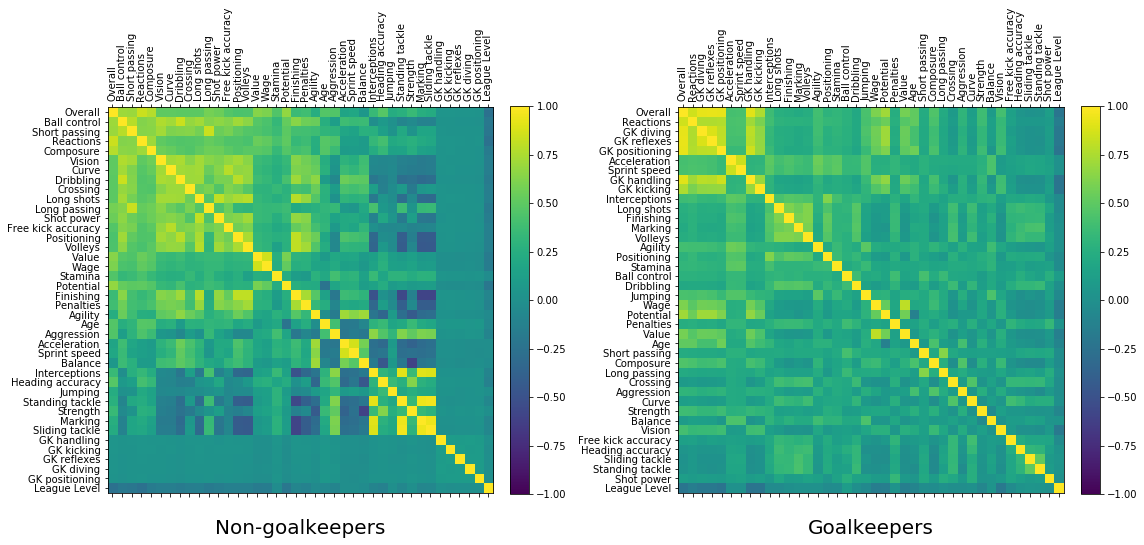

In [10]:
corrGK = dfGK.loc[:,'Age':'Volleys'].corr();
corrNotGK = dfNotGK.loc[:,'Age':'Volleys'].corr();

order = (-corrGK.mean()).argsort();
corrGK = corrGK.iloc[order, order];
order = (-corrNotGK.mean()).argsort();
corrNotGK = corrNotGK.iloc[order, order];

fig = plt.figure(figsize=(16,8));

plotCorrMatrix(corrNotGK, fig, 121);
plt.xlabel('\nNon-goalkeepers', size=20);
plotCorrMatrix(corrGK, fig, 122);
plt.xlabel('\nGoalkeepers', size=20);

plt.tight_layout();

In these plots columns and rows are sorted by average correlation values. General observations: Overall rating has the highest correlation average, meaning that the higher are the attributes, the higher the overall rating will be. The lowest(highest negative) correlation average has league level, i.e. the higher parameter correspond to smaller number(higher level) of league, 1 beeing the best league.

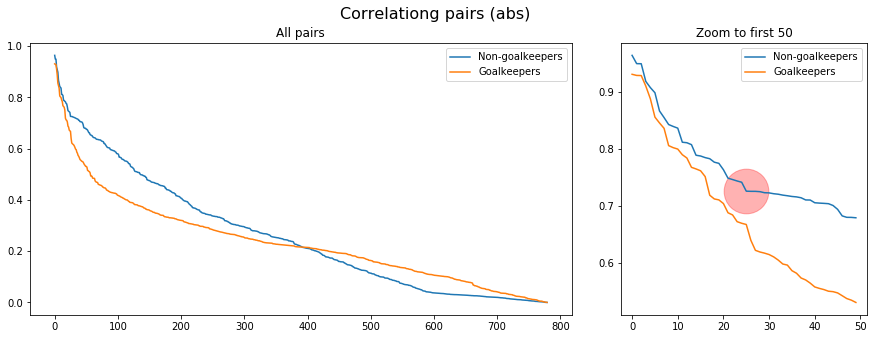

In [11]:
def sortCorrelations(corrMat):
    corrValues = corrMat.abs().unstack();
    relativeIndices = [(i, j) for i, j in corrValues.index if i < j];
    mostVals = corrValues[relativeIndices].sort_values(ascending=False);
    return mostVals;

mostNotGK = sortCorrelations(corrNotGK);
mostGK = sortCorrelations(corrGK);

labels = ['Non-goalkeepers', 'Goalkeepers'];
plt.figure(figsize=(15,5));
plt.suptitle('Correlationg pairs (abs)', size=16);
plt.subplot2grid((1, 3), (0, 0), colspan=2);
plt.title('All pairs');
plt.plot(mostNotGK.values);
plt.plot(mostGK.values);
plt.legend(labels);
plt.subplot2grid((1, 3), (0, 2));
plt.title('Zoom to first 50');
plt.plot(mostNotGK[:50].values);
plt.plot(mostGK[:50].values);
elbow = 25;
plt.scatter(elbow, mostNotGK[elbow], s=2000, color='r', alpha=0.3)
plt.legend(labels);

On this plot can the the 'elbow' change in behavior, meaning, that we should consider about first 25 pairs.

In [12]:
print('    Non-goalkeepers');
print(mostNotGK[:elbow]);
print('    Goalkeepers');
print(mostGK[:elbow]);

    Non-goalkeepers
Sliding tackle  Standing tackle       0.963862
Marking         Sliding tackle        0.949337
                Standing tackle       0.949175
Interceptions   Standing tackle       0.918241
                Marking               0.907352
                Sliding tackle        0.898354
Acceleration    Sprint speed          0.866429
Value           Wage                  0.854801
Long passing    Short passing         0.842618
Ball control    Dribbling             0.839257
Overall         Reactions             0.836261
Finishing       Volleys               0.811596
                Positioning           0.810713
Long shots      Shot power            0.807364
Ball control    Short passing         0.788788
Finishing       Long shots            0.787436
Dribbling       Positioning           0.784628
Curve           Free kick accuracy    0.782703
Composure       Overall               0.776615
Long shots      Volleys               0.774582
Ball control    Vision                0.

Something unusual?

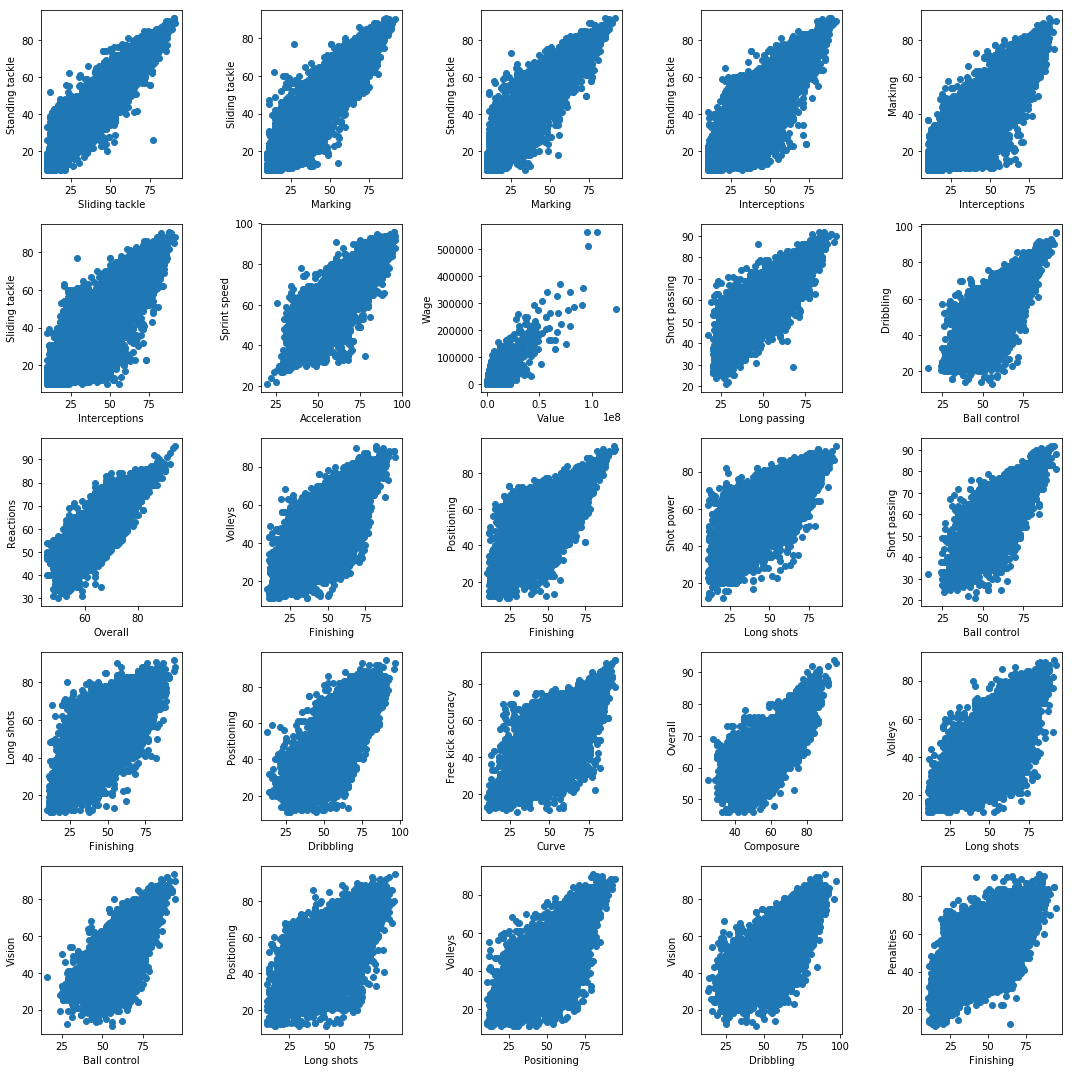

In [13]:
plt.figure(figsize=(15,15));
for i,(a,b) in enumerate(mostNotGK[:elbow].index):
    plt.subplot(5, 5, i+1);
    plt.scatter(dfNotGK[a], dfNotGK[b]);
    plt.xlabel(a);
    plt.ylabel(b);
plt.tight_layout()

In [14]:
intersectionIndex = mostNotGK[:elbow].index.intersection(mostGK[:elbow].index);
pd.DataFrame({'Non-goalkeeper':mostNotGK[intersectionIndex], 'Goalkeeper':mostGK[intersectionIndex]})

,,Goalkeeper,Non-goalkeeper
Acceleration,Sprint speed,0.835950,0.866429
Overall,Reactions,0.855606,0.836261
Value,Wage,0.802074,0.854801


Interesting plot to look at might be Value to Wage

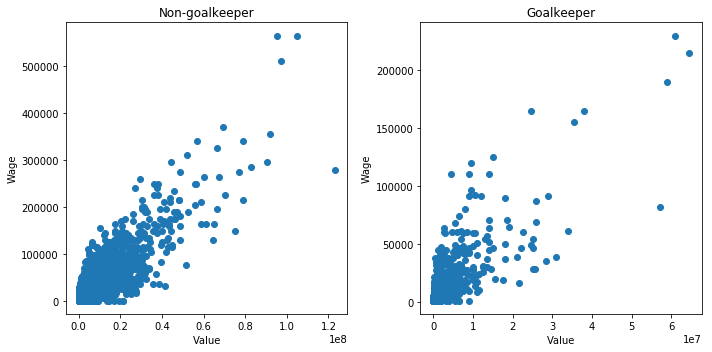

In [15]:
plt.figure(figsize=(10, 5));
aCol = 'Value';
bCol = 'Wage';
plt.subplot(1, 2, 1);
plt.title('Non-goalkeeper');
plt.scatter(dfNotGK[aCol], dfNotGK[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.subplot(1, 2, 2);
plt.title('Goalkeeper');
plt.scatter(dfGK[aCol], dfGK[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.tight_layout();

We can see linear relation, but with exponential grow, meaning, as the value(wage) increases, the number of such players decreses. It is consistent across all players.

We can make another assumpion, based on normal distribution of overall rating. Wage of players increases exponentially with their rating. We did not see it in the correlations as we were looking for linear dependencies.

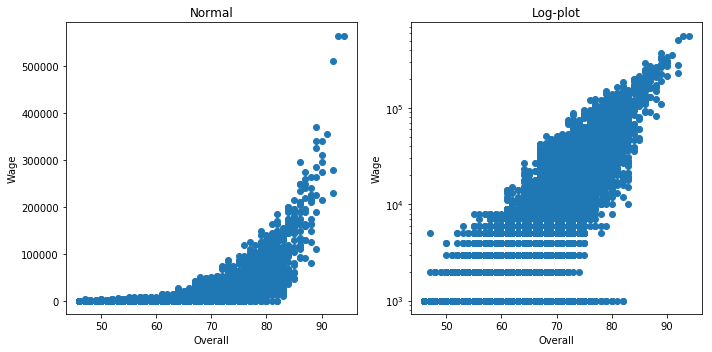

In [16]:
plt.figure(figsize=(10, 5));
aCol = 'Overall';
bCol = 'Wage';
plt.subplot(1, 2, 1);
plt.title('Normal');
plt.scatter(df[aCol], df[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.subplot(1, 2, 2);
plt.title('Log-plot');
plt.scatter(df[aCol], df[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.yscale('log');
plt.tight_layout();

Triangular shape of the log-plot means thet there are a lot of underpaid players(some players with rating over 80 get the minimum wage, while with exponential trend, they shold have been payes 100 times that). Later we will look where they are!

Let's look for correlations within groups of attributes. Groups are defined as follows:

In [17]:
pd.DataFrame.from_dict(groups, orient='index').fillna(value='').T

,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping
0,Crossing,Dribbling,Acceleration,Shot power,Aggression,Marking,GK diving
1,Finishing,Curve,Sprint speed,Jumping,Interceptions,Standing tackle,GK handling
2,Heading accuracy,Free kick accuracy,Agility,Stamina,Positioning,Sliding tackle,GK kicking
3,Short passing,Long passing,Reactions,Strength,Vision,,GK positioning
4,Volleys,Ball control,Balance,Long shots,Penalties,,GK reflexes
5,,,,,Composure,,


In [18]:
inGroupCorr = {gr: [df[col1].corr(df[col2]) for col1 in groups[gr] for col2 in groups[gr] if col1 != col2] for gr in groups};
pd.DataFrame({gr: {
    'min': np.min(inGroupCorr[gr]),
    'avg': np.average(inGroupCorr[gr]),
    'max': np.max(inGroupCorr[gr])
} for gr in groups}).T

,avg,max,min
Attacking,0.645355,0.879123,0.471695
Defending,0.964835,0.972461,0.960983
Goalkeeping,0.967189,0.972544,0.962595
Mentality,0.486891,0.800049,0.112506
Movement,0.537259,0.915451,0.138386
Power,0.344670,0.879744,0.043771
Skill,0.788988,0.932669,0.705563


Most parameters in groups have high correlation. No negative values means, that groups are well defined and describe relative attributes. Power and mentality are low. For the latter it is ok, as mental characteristic may vary. And power group may need reforming

In [19]:
df[groups['Power']].corr()

,Shot power,Jumping,Stamina,Strength,Long shots
Shot power,1.000000,0.171220,0.618315,0.166326,0.879744
Jumping,0.171220,1.000000,0.346877,0.264739,0.114892
Stamina,0.618315,0.346877,1.000000,0.249092,0.591725
Strength,0.166326,0.264739,0.249092,1.000000,0.043771
Long shots,0.879744,0.114892,0.591725,0.043771,1.000000


Strength and Jumping look like they do not belong to this group. But they still will be, because they represent Power characteristics. What is interesting, that Strength is not correlated with Shot power or even more with Long shots. ???

In [20]:
df[groups['Movement']].corr().unstack().sort_values()[:6:2]

Reactions     Balance         0.138386
Acceleration  Reactions       0.190832
Reactions     Sprint speed    0.194464
dtype: float64

From this we can note, thet Acceleration does not influence Reactions

Correlations also may be complex, i.e. involve more than two attributes.

We can look for other correlations, but we need to normalize all columns, as we will take their difference. If some of the variable are correlated by themselves, we cosider a group, only if it is higher

In [21]:
primaryDf = dfGK.loc[:,'Age':'Volleys'].select_dtypes(include=[np.number]);
primaryDf = primaryDf.loc[:, primaryDf.columns.str[:2] != 'GK']
normDf = (primaryDf - primaryDf.mean()) / primaryDf.max();
diffCorr = {};
n = len(normDf.columns);
for i in range(n):
    for j in range(i+1, n):
        for k in range(n):
            if (k != i and k != j):
                a = normDf.columns[i];
                b = normDf.columns[j];
                c = normDf.columns[k];
                abcCorr = (normDf[a] - normDf[b]).corr(normDf[c]);
                if (abs(corrNotGK[a][b]) < abs(abcCorr) and
                    abs(corrNotGK[b][c]) < abs(abcCorr) and
                    abs(corrNotGK[c][a]) < abs(abcCorr)):
                    diffCorr[a,b,c] = abcCorr;

In [22]:
dcSer = pd.Series(diffCorr)
mostDiff = dcSer[(-dcSer.abs()).sort_values().index].head((dcSer.abs()>0.6).sum());
mostDiff

Overall    Potential  Age          0.863126
Age        Overall    Potential   -0.723560
Potential  Reactions  Age         -0.692081
Age        Reactions  Potential   -0.677630
dtype: float64

Axes are normalized!


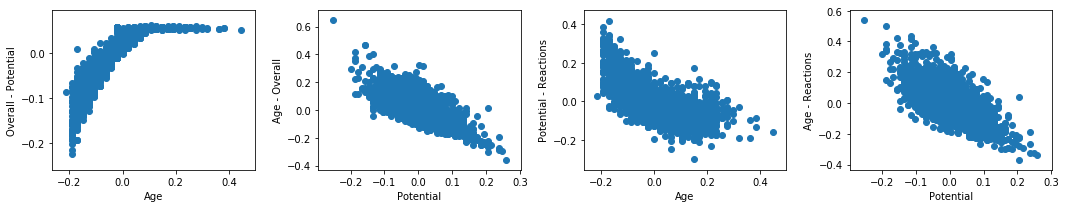

In [23]:
plt.figure(figsize=(15,3));
for i,(a,b,c) in enumerate(mostDiff.index):
    plt.subplot(1, 4, i+1);
    plt.scatter(normDf[c], normDf[a]-normDf[b]);
    plt.ylabel('{} - {}'.format(a,b));
    plt.xlabel(c);
plt.tight_layout()
print('Axes are normalized!')

Age negatively correlates with remaining potential: the younger you are, the more potential you have.

Correlation: -0.862786469354


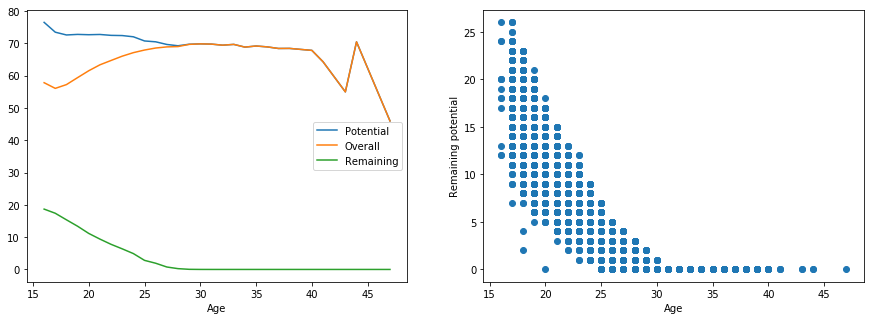

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1);
ageGroups = df.groupby('Age');
plt.plot(ageGroups['Potential'].mean());
plt.plot(ageGroups['Overall'].mean());
plt.plot(ageGroups['Potential'].mean()-ageGroups['Overall'].mean());
plt.xlabel('Age');
plt.legend(['Potential', 'Overall', 'Remaining']);
plt.subplot(1,2,2);
remPot = df['Potential'] - df['Overall'];
plt.scatter(df['Age'], remPot);
plt.xlabel('Age');
plt.ylabel('Remaining potential');
print('Correlation:', remPot.corr(df['Age']))

For the age around 30, no one can have more potential. Sharp oscilations at the end indicate, thet there are not many old football players.

From the second group we can conclude that age together with reactions can give you a player potential. Below, coefficient is used to get the highest correlation, because for previous analysis we used normalized values. Reaction is correlated with potential, bit not enough to get in top 25 from first analysis. Substracting age, gets us high correspondance.

Correlation: 0.730799944956


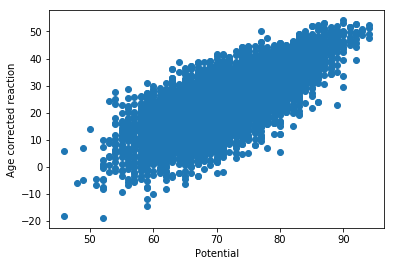

In [25]:
coef = 1.47;
plt.scatter(df['Potential'], df['Reactions']-coef*df['Age']);
plt.xlabel('Potential');
plt.ylabel('Age corrected reaction');
print('Correlation:', (df['Reactions']-coef*df['Age']).corr(df['Potential']));